# VapoRock
* A thermodynamic model for vaporized silicate rocks & melts relevant to magma ocean atmospheres and stellar nebula

In [1]:
import vaporock

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
from thermoengine import model

In [2]:
# melt_comp_wts = {'MgO':36.9, 'CaO':3.3, 'Al2O3':4.6, 'SiO2':50.7, 
#                  'Na2O':3e-7, 'K2O':3e-10, 'FeO':3.5}

# BSE composition from Schaefer & Fegley (TiO2 neglected)
melt_comp_wts = {'SiO2':45.97, 'MgO':36.66, 'Al2O3':4.77, 'FeO':8.24, 
                 'CaO':3.78, 'Na2O':0.35, 'K2O':0.04}


/Users/aswolf/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
system = vaporock.System()
system.set_melt_comp(melt_comp_wts)
system.print_melt_comp()

MELTS liquid components:


[('SiO2', 0.09376302671600419),
 ('TiO2', 0.0),
 ('Al2O3', 0.02427604939215259),
 ('Fe2O3', 0.0),
 ('MgCr2O4', 0.0),
 ('Fe2SiO4', 0.03002944129782759),
 ('MnSi0.5O2', 0.0),
 ('Mg2SiO4', 0.23815793315057002),
 ('NiSi0.5O2', 0.0),
 ('CoSi0.5O2', 0.0),
 ('CaSiO3', 0.03529746281790487),
 ('Na2SiO3', 0.002957188086717984),
 ('KAlSiO4', 0.00044474936870234484),
 ('Ca3(PO4)2', 0.0),
 ('H2O', 0.0)]

In [4]:
T = 2200
P = 1e-10
buffer = 'IW'
dlogfO2 = +1.5
g=36.2
logfO2 = system.redox_buffer(T, P, buffer=buffer)+dlogfO2

/Users/aswolf/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
logP, lnK, lna =  system.eval_gas_abundances(T, logfO2, full_output=True)


In [6]:

# density = system.calc_column_density(logP, logfO2, g)
# density_high = system.get_abundant_species(density, N=20)
mol_elem_frac, Ptotal = system.calc_gas_props(T, logP, include_O2=True )
mol_elem_frac

2200
O   1.144351e-01
Mg  6.167094e-03
Ca  1.164809e-07
Al  3.491108e-07
Si  3.639135e-02
Na  7.512973e-01
K   5.401634e-02
Fe  3.769238e-02

In [7]:
system.vapor.species_comps.columns

/Users/aswolf/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['O', 'Mg', 'Ca', 'Al', 'Si', 'Na', 'K', 'Fe'], dtype='object')

In [8]:
all_elems = ['Si', 'Ti', 'Al', 'Fe', 'Cr', 'Fe', 'Mn', 'Mg', 'Ni', 'Co', 'Ca', 'Na', 'K', 'P', 'H', 'C', 'O']

In [9]:
system.mol_liq

array([0.09376303, 0.        , 0.02427605, 0.        , 0.        ,
       0.03002944, 0.        , 0.23815793, 0.        , 0.        ,
       0.03529746, 0.00295719, 0.00044475, 0.        , 0.        ])

In [10]:
system.oxide_mols

array([4.00649801e-01, 0.00000000e+00, 2.44984241e-02, 0.00000000e+00,
       0.00000000e+00, 6.00588826e-02, 0.00000000e+00, 4.76315866e-01,
       0.00000000e+00, 0.00000000e+00, 3.52974628e-02, 2.95718809e-03,
       2.22374684e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [11]:
system.chem.MOL_OXIDE_TO_ELEM

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 5],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2]])

In [12]:
system.chem.OXIDE_ORDER

array(['SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'Cr2O3', 'FeO', 'MnO', 'MgO',
       'NiO', 'CoO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'H2O', 'CO2'],
      dtype='<U5')

In [13]:

plt.rc('axes', prop_cycle=(cycler(linestyle=['-', '--', ':', '-.'])*
                           cycler(color=['c','m','k','y','r','g','b'])))

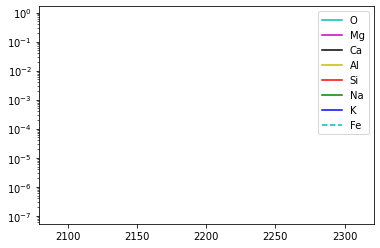

In [14]:
plt.figure()
plt.semilogy(T, mol_elem_frac.T)
plt.legend(mol_elem_frac.index)
